<a href="https://colab.research.google.com/github/Deekshakim07/Assignment-5-UCS654/blob/main/Review%20Analysis%20System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import re
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [4]:
ps = PorterStemmer()

In [5]:
dataset=pd.read_csv('/content/IMDB Dataset.csv')

In [6]:

all_stopwords = stopwords.words('english') #Converting all the words in english language format
all_stopwords.remove('not')
dataset.loc[dataset['sentiment'] == 'positive', 'sentiment',] = 1
dataset.loc[dataset['sentiment'] == 'negative', 'sentiment',] = 0
corpus=[]

In [7]:
for i in range(0, 5000):
  review = re.sub('[^a-zA-Z0-9\s]', ' ', dataset['review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Assuming 'corpus' is already defined and contains the text data

# Using CountVectorizer to transform the corpus
cv = CountVectorizer(max_features=2000)
X = cv.fit_transform(corpus).toarray()

# Correct indexing to get the labels
y = dataset.iloc[0:5000, -1].values

# Using TfidfVectorizer to transform the corpus
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X1 = feature_extraction.fit_transform(corpus).toarray()

# Correct indexing to get the labels
y1 = dataset.iloc[0:5000, -1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(X1, y1, test_size = 0.20, random_state = 3)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

[[407  86]
 [186 321]]
Accuracy on testing data :  0.728
Precision on testing data :  0.7886977886977887
Recall on testing :  0.6331360946745562
R squared Error is :  -0.08821328980480181


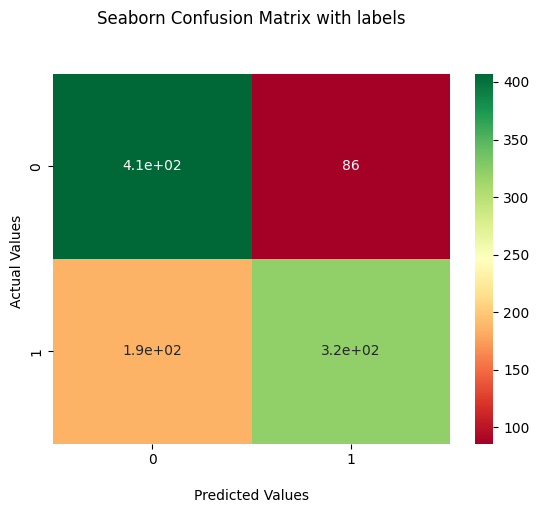

In [15]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
accuracy= accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
error_score = metrics.r2_score(y_test, y_pred)
print('Accuracy on testing data : ', accuracy)
print('Precision on testing data : ', precision)
print('Recall on testing : ', recall)
print("R squared Error is : ", error_score)
ax = sns.heatmap(cm1, annot=True, cmap='RdYlGn')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

In [16]:
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

In [17]:
## Display the visualization of the Confusion Matrix.
plt.show()
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, Y_train)
y_pred1 = model.predict(x_test)
cm2 = confusion_matrix(Y_test, y_pred1)
print(cm2)
accuracy= accuracy_score(Y_test, y_pred1)
precision = precision_score(Y_test, y_pred1)
recall= recall_score(Y_test, y_pred1)
error_score = metrics.r2_score(Y_test, y_pred1)
print('Accuracy on testing data : ', accuracy)
print('Precision on testing data : ', precision)
print('Recall on testing : ', recall)
print("R squared Error is : ", error_score)



[[405  88]
 [ 63 444]]
Accuracy on testing data :  0.849
Precision on testing data :  0.8345864661654135
Recall on testing :  0.8757396449704142
R squared Error is :  0.39588159279218726


In [21]:
#manually writining a review
input_review = ["Waste of Money"]
# convert text to feature vectors similar to what we did earlier.
input_data_features = feature_extraction.transform(input_review)
# making prediction
prediction = model.predict(input_data_features)
if (prediction[0]==1):
  print('Positive')
elif (prediction[0]==0):
  print('Negative')

Negative
